In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# %matplotlib inline

# __Forage BCG X Case__

## Exploratory data Analysis

### Predict Customer Churn

In [2]:
# Load data
# churn = pd.read_csv('churn_data_modeling.csv') this is what someone else did. nice to look at as a guide but we shouldn't use it
client = pd.read_csv('client_data.csv')
price = pd.read_csv('price_data.csv')

# __Client__

In [3]:
print(client.info())
client

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [4]:
# client.isnull().sum() no null values

In [54]:
(client.churn.value_counts(normalize=True)*100).round(2)

churn
0    90.28
1     9.72
Name: proportion, dtype: float64

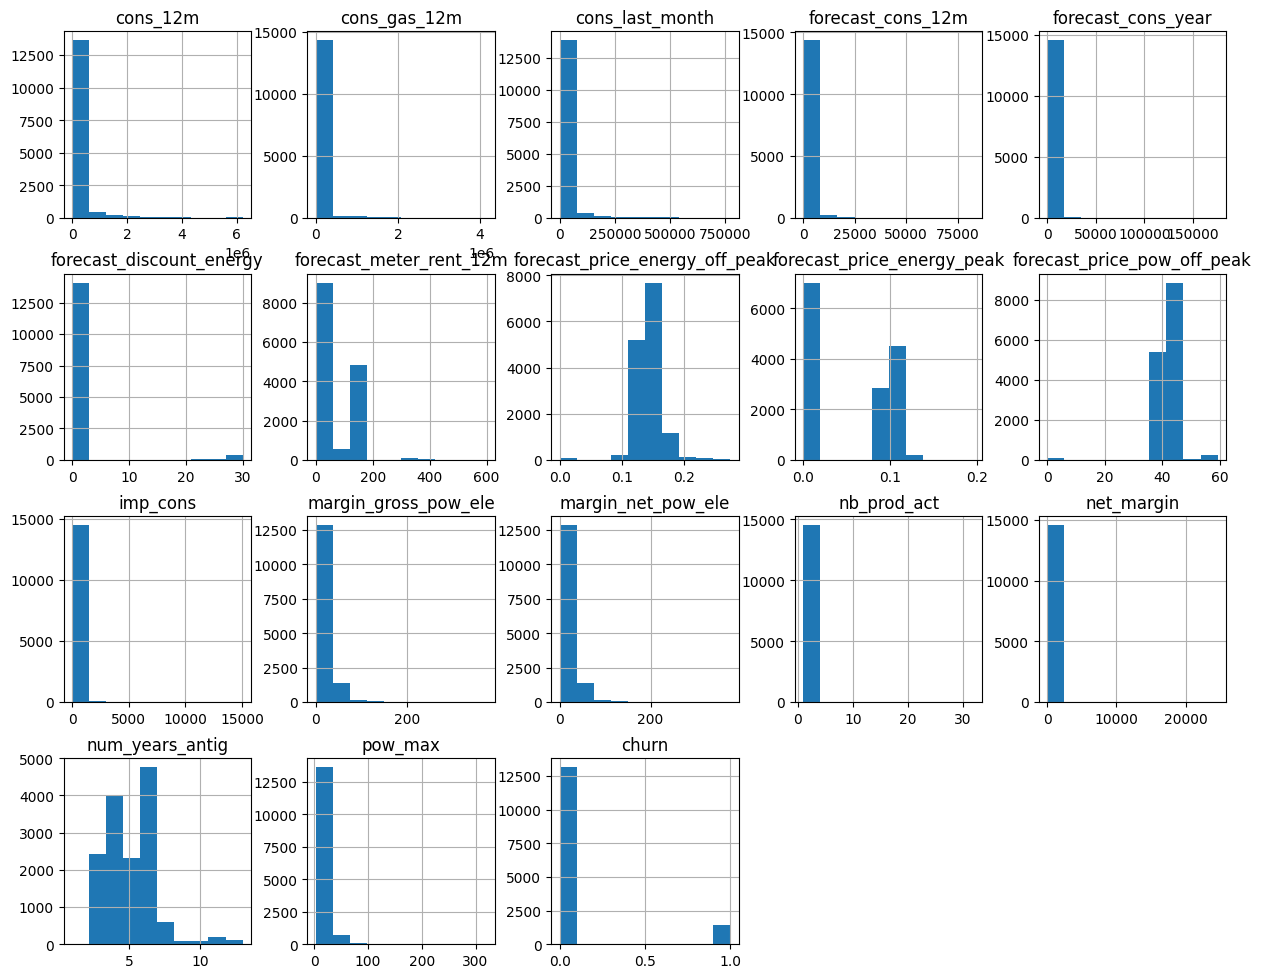

In [5]:
plt.show()
client.hist(layout=(5, 5), figsize=(15,15))
plt.show()

Most consumption skewed left, most data is really. See a big imbalance between churn and non-churn.

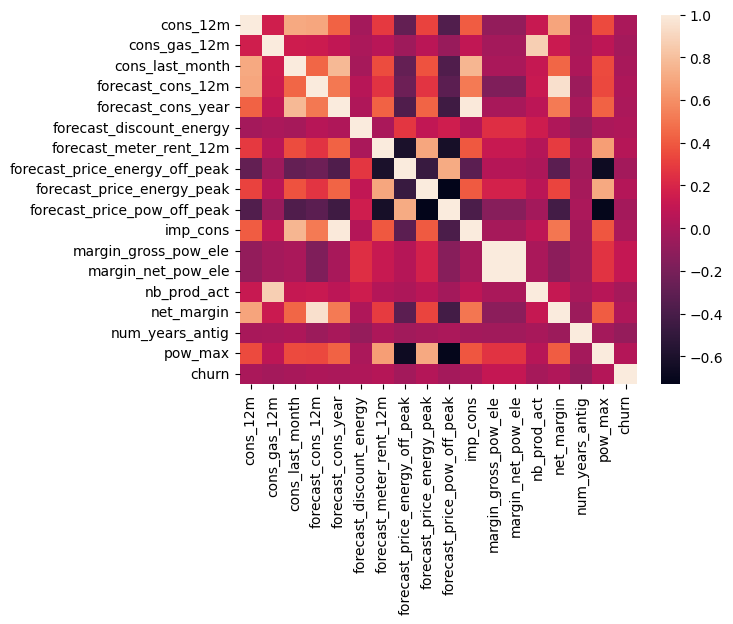

In [6]:
plt.show()
sns.heatmap(client.corr(numeric_only=True, method='spearman'))
plt.show()

Churn is not obviously strongly correlated with anything, but we do see some small correlations with margin gross/net power electricity, as well as forecast meter rent 12 months and forecast price energy peak.

In [7]:
# Investigate trends with churn customers
# group by channel_sales, then churn, then grab a column, get it's count, unstack column wise (so churn is unstacked into 1 & 0, we fill in missing values with 0, and sort by whichever column)
channel = client.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0).sort_values(1, ascending=0)
# then we divide row wise with the sum of the column
channel_pct = (channel.div(channel.sum(axis=1), axis=0) * 100).round(2)

channel_pct

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.86,12.14
MISSING,92.40,7.60
usilxuppasemubllopkaafesmlibmsdf,89.96,10.04
lmkebamcaaclubfxadlmueccxoimlema,94.41,5.59
ewpakwlliwisiwduibdlfmalxowmwpci,91.60,8.40
epumfxlbckeskwekxbiuasklxalciiuu,100.00,0.00
fixdbufsefwooaasfcxdxadsiekoceaa,100.00,0.00
sddiedcslfslkckwlfkdpoeeailfpeds,100.00,0.00


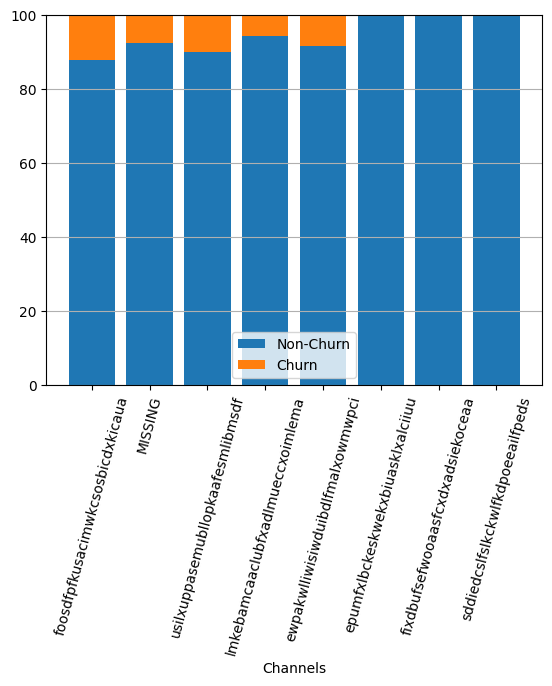

In [8]:
plt.figure()
plt.bar(channel_pct.index, channel_pct[0], label='Non-Churn')
plt.bar(channel_pct.index, channel_pct[1], bottom=channel_pct[0], label='Churn')
plt.xlabel('Channels')
plt.xticks(rotation=75)
plt.legend(loc='lower center')
plt.grid(axis='y')
plt.show()

Only customers through certain channel sales churn, from the above 5 channels. Missing is one of those.

In [9]:
cons = client[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'churn']]

cons.groupby('churn').agg(['mean', 'std', 'median']).astype(int).transpose()

churn                        0       1
cons_12m        mean    167867   78862
                std     596815  260433
                median   14075   14529
cons_gas_12m    mean     30121    9235
                std     170618   49685
                median       0       0
cons_last_month mean     17046    7205
                std      67096   26795
                median     800     740

So churners are ones who consume less, on average, and make up a smaller group of those who consume less. 

In [10]:
# Forecast

forc = client.filter(like='forecast').join(client.churn)
forc.groupby('churn').agg(['mean', 'std', 'median']).astype(int).transpose()

churn                                     0     1
forecast_cons_12m              mean    1858  1962
                               std     2344  2756
                               median  1108  1152
forecast_cons_year             mean    1402  1374
                               std     3302  2691
                               median   312   326
forecast_discount_energy       mean       0     1
                               std        5     5
                               median     0     0
forecast_meter_rent_12m        mean      62    72
                               std       65    70
                               median    18    19
forecast_price_energy_off_peak mean       0     0
                               std        0     0
                               median     0     0
forecast_price_energy_peak     mean       0     0
                               std        0     0
                               median     0     0
forecast_price_pow_off_peak    mean      43    43
                               std        4     3
                               median    44    44

Forecasts don't seem to be a good indicator of churners.

In [11]:
# Has gas and current paid consumption
gas = client[['has_gas', 'churn']].groupby(['churn', 'has_gas']).value_counts().unstack(level=0)
gas = (gas.div(gas.sum(axis=1), axis=0) * 100).round(1)
gas

churn,0,1
has_gas,,
f,89.9,10.1
t,91.8,8.2


Similar percentage of churners and non-churners have gas, probably not a good indicator.

In [12]:
impcons = client[['imp_cons', 'churn']].groupby('churn').agg(['mean', 'std', 'median']).astype(int).transpose()
impcons['pct_diff'] = ((impcons[1] - impcons[0]) / impcons[0] * 100).round(1)
impcons

churn              0    1  pct_diff
imp_cons mean    152  151      -0.7
         std     346  290     -16.2
         median   36   41      13.9

Current paid consumption very similar between 

In [13]:
# Price sensitivity over 1 year
client.date_activ = pd.to_datetime(client.date_activ, format='%Y-%M-%d')
client.date_end = pd.to_datetime(client.date_end, format='%Y-%M-%d')
client.date_modif_prod = pd.to_datetime(client.date_modif_prod, format='%Y-%M-%d')
client.date_renewal = pd.to_datetime(client.date_renewal, format='%Y-%M-%d')

In [14]:
nb_prod = client[['nb_prod_act', 'churn']].groupby(['nb_prod_act', 'churn']).value_counts().unstack(1).fillna(0)
nb_prod = (nb_prod.div(nb_prod.sum(axis=1), axis=0) * 100).round(2)
nb_prod

churn,0,1
nb_prod_act,,
1,90.02,9.98
2,91.49,8.51
3,90.06,9.94
4,90.00,10.00
5,90.32,9.68
6,100.00,0.00
8,100.00,0.00
9,100.00,0.00
10,100.00,0.00


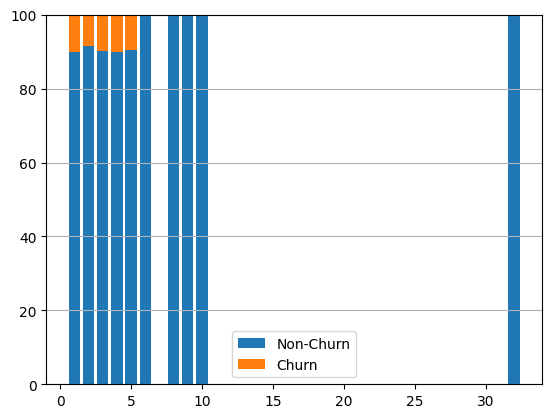

In [22]:
# plt.figure()
plt.bar(nb_prod.index, nb_prod[0], label='Non-Churn')
plt.bar(nb_prod.index, nb_prod[1], bottom=nb_prod[0], label='Churn')
plt.legend()
plt.grid(axis='y')
plt.show()

So only customers with 5 or fewer products are churning, customers with more products (and possibly more consumption) are not churning. Interesting! This could be a good indicator of churners.

In [23]:
# Number of years of client
age = client[['num_years_antig', 'churn']].groupby(['num_years_antig', 'churn']).value_counts().unstack(level=1).fillna(0)
age = (age.div(age.sum(axis=1), axis=0) * 100).round(1)
age

churn,0,1
num_years_antig,,
1,100.0,0.0
2,72.7,27.3
3,86.5,13.5
4,88.1,11.9
5,91.4,8.6
6,92.9,7.1
7,91.7,8.3
8,95.1,4.9
9,98.9,1.1


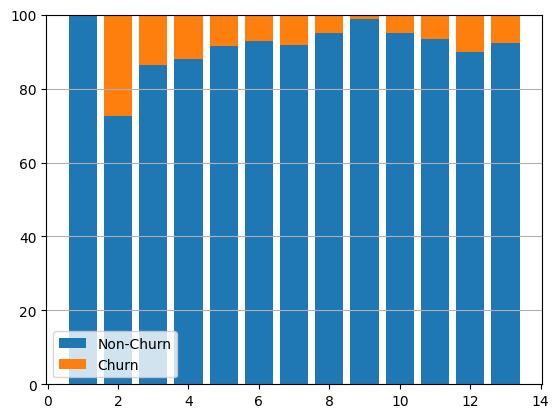

In [ ]:
plt.figure()
plt.bar(age.index, age[0], label='Non-Churn')
plt.bar(age.index, age[1], bottom=age[0], label='Churn')
plt.legend()
plt.grid(axis='y')
plt.show()

In [38]:
origin = client[['origin_up', 'churn']].groupby('churn').value_counts().unstack(level=1).fillna(0).transpose()
origin = (origin.div(origin.sum(axis=1), axis=0) * 100).round(2)
origin

churn,0,1
origin_up,,
MISSING,93.75,6.25
ewxeelcelemmiwuafmddpobolfuxioce,100.00,0.00
kamkkxfxxuwbdslkwifmmcsiusiuosws,93.99,6.01
ldkssxwpmemidmecebumciepifcamkci,91.61,8.39
lxidpiddsbxsbosboudacockeimpuepw,87.42,12.58
usapbepcfoloekilkwsdiboslwaxobdp,100.00,0.00


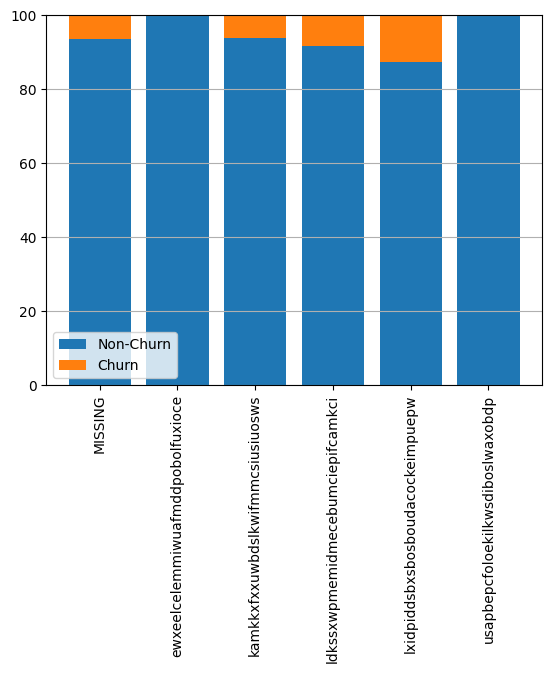

In [39]:
plt.figure()
plt.bar(origin.index, origin[0], label='Non-Churn')
plt.bar(origin.index, origin[1], bottom=origin[0], label='Churn')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

In [49]:
power = client[['pow_max', 'churn']].groupby('churn').agg(['mean', 'std', 'median', 'sum', 'count']).round().transpose()
power

churn                  0        1
pow_max mean        18.0     19.0
        std         13.0     17.0
        median      14.0     14.0
        sum     237370.0  27511.0
        count    13187.0   1419.0

Subscribed power likely not a good indicator.

# __Price__

In [124]:
# Inspect price
price = pd.read_csv('price_data.csv')
print(price.info())
price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
None


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


<Figure size 640x480 with 0 Axes>

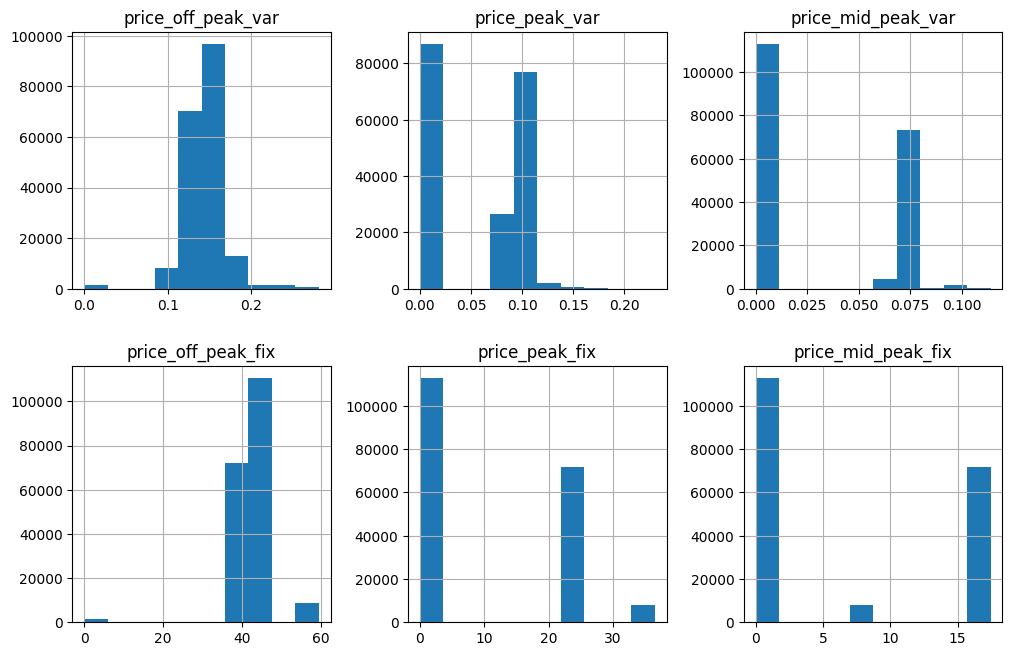

In [125]:
plt.figure()
price.hist(layout=(3,3), figsize=(12,12))
plt.show()

In [126]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [127]:
price.price_date = pd.to_datetime(price.price_date, format='%Y-%m-%d')
price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [128]:
# aggregate prices into year, last 6 months, last 3 months
mean_y = price.groupby('id').mean().reset_index().add_suffix('_mean_year')
mean_6 = price[price['price_date'] > '2015-06-01'].groupby('id').mean().reset_index().drop(columns='price_date').add_suffix('_mean_6m')
mean_3 = price[price['price_date'] > '2015-09-01'].groupby('id').mean().reset_index().drop(columns='price_date').add_suffix('_mean_3m')

In [129]:
price_features_x = pd.merge(mean_y, mean_6, left_on='id_mean_year', right_on='id_mean_6m')
price_features = pd.merge(price_features_x, mean_3, left_on='id_mean_year', right_on='id_mean_3m')
price_features

,id_mean_year,price_date_mean_year,price_off_peak_var_mean_year,price_peak_var_mean_year,price_mid_peak_var_mean_year,price_off_peak_fix_mean_year,price_peak_fix_mean_year,price_mid_peak_fix_mean_year,id_mean_6m,price_off_peak_var_mean_6m,...,price_off_peak_fix_mean_6m,price_peak_fix_mean_6m,price_mid_peak_fix_mean_6m,id_mean_3m,price_off_peak_var_mean_3m,price_peak_var_mean_3m,price_mid_peak_var_mean_3m,price_off_peak_fix_mean_3m,price_peak_fix_mean_3m,price_mid_peak_fix_mean_3m
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0002203ffbb812588b632b9e628cc38d,0.121266,...,40.728885,24.437330,16.291555,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0004351ebdd665e6ee664792efc4fd13,0.144687,...,44.444710,0.000000,0.000000,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,...,45.944710,0.000000,0.000000,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0010ee3855fdea87602a5b7aba8e42de,0.114428,...,40.728885,24.437330,16.291555,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,00114d74e963e47177db89bc70108537,0.146184,...,44.266930,0.000000,0.000000,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-06-16 12:00:00,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,ffef185810e44254c3a4c6395e6b4d8a,0.113848,...,40.728885,24.437330,16.291555,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-06-16 12:00:00,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,fffac626da707b1b5ab11e8431a4d0a2,0.145449,...,44.355820,0.000000,0.000000,fffac626da707b1b5ab11e8431a4d0a2,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-06-16 12:00:00,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,fffc0cacd305dd51f316424bbb08d1bd,0.152759,...,41.228885,24.937330,16.791555,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-06-16 12:00:00,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,...,40.647429,24.388454,16.258969,fffe4f5646aa39c7f97f95ae2679ce64,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


In [130]:
# Check that we merged correctly
# price_features[['id_mean_year', 'id_mean_6m', 'id_mean_3m']]
if (price_features['id_mean_year'] == price_features['id_mean_3m']).all():
    print('True')

True


In [131]:
# clean up price features
price_features = price_features.rename(columns={'id_mean_year':'id', 'price_date_mean_year':'price_date'}).drop(['id_mean_6m', 'id_mean_3m'], axis='columns')
price_features

,id,price_date,price_off_peak_var_mean_year,price_peak_var_mean_year,price_mid_peak_var_mean_year,price_off_peak_fix_mean_year,price_peak_fix_mean_year,price_mid_peak_fix_mean_year,price_off_peak_var_mean_6m,price_peak_var_mean_6m,price_mid_peak_var_mean_6m,price_off_peak_fix_mean_6m,price_peak_fix_mean_6m,price_mid_peak_fix_mean_6m,price_off_peak_var_mean_3m,price_peak_var_mean_3m,price_mid_peak_var_mean_3m,price_off_peak_fix_mean_3m,price_peak_fix_mean_3m,price_mid_peak_fix_mean_3m
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-06-16 12:00:00,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-06-16 12:00:00,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-06-16 12:00:00,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-06-16 12:00:00,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


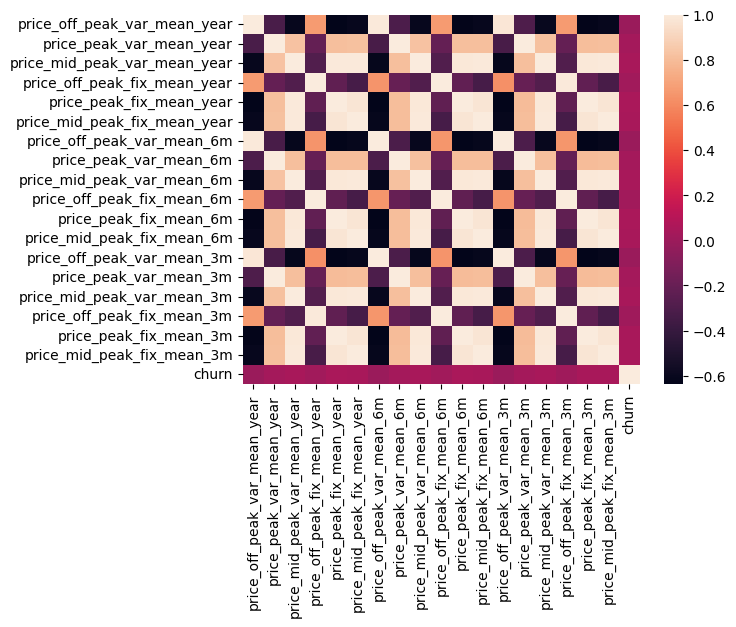

In [132]:
price_analysis = pd.merge(price_features, client[['id', 'churn']])

plt.figure()
sns.heatmap(price_analysis.corr(numeric_only=True))
plt.show()

From this we can conclude that churn is NOT sensitive to price change.

In [137]:
# Assemble final df
churn = pd.merge(client, price_analysis.drop(['churn', 'price_date'], axis=1), on='id')
churn.to_csv('churn.csv')